In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#import necessary library

import pandas as pd
import numpy as np
import random as rnd     

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score

from sklearn.preprocessing import StandardScaler
# machine learning
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,KNNImputer
from sklearn.pipeline import FeatureUnion,make_pipeline,Pipeline
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')


In [4]:
#read the dataset through head method

data_1 = pd.read_csv(r'https://raw.githubusercontent.com/Jyotsnajha12345/My-coding/main/01_District_wise_crimes_committed_IPC_2001_2012.csv?token=GHSAT0AAAAAACK5DPKHO5E3K7XBOZNI32XWZM3UBUA')
data_1.head()


,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Unnamed: 33,Total Crimes
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,16,149,34,175,0,181,1518,4154,NaN,8603
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,7,118,24,154,0,270,754,4125,NaN,8692
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,14,112,83,186,0,404,1262,5818,NaN,12445
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,17,126,38,57,0,233,1181,3140,NaN,6498
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,12,109,58,247,0,431,2313,6507,NaN,14107


In [5]:
#read the dataset through head method

data_2 = pd.read_csv(r'https://raw.githubusercontent.com/Jyotsnajha12345/My-coding/main/02_01_District_wise_crimes_committed_against_SC_2001_2012.csv?token=GHSAT0AAAAAACK5DPKH4KSJSKINNVUQEVT6ZM3UKRA')
data_2.head()


,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs,Unnamed: 13,Total Crimes
0,ANDHRA PRADESH,ADILABAD,2001,0,1,4,0,0,0,3,0,15,32,NaN,55
1,ANDHRA PRADESH,ANANTAPUR,2001,0,4,0,0,0,0,49,21,0,53,NaN,127
2,ANDHRA PRADESH,CHITTOOR,2001,3,3,0,0,0,0,38,36,0,34,NaN,114
3,ANDHRA PRADESH,CUDDAPAH,2001,0,3,0,0,0,0,20,52,0,25,NaN,100
4,ANDHRA PRADESH,EAST GODAVARI,2001,1,3,0,0,0,0,3,12,63,7,NaN,89


In [6]:
#read the dataset through head method

data_3 = pd.read_csv(r'https://raw.githubusercontent.com/Jyotsnajha12345/My-coding/main/02_District_wise_crimes_committed_against_ST_2001_2012.csv?token=GHSAT0AAAAAACK5DPKHG67XIDPOWXARISZKZM3UNLA')
data_3.head()


,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping Abduction,Dacoity,Robbery,Arson,Hurt,Protection of Civil Rights (PCR) Act,Prevention of atrocities (POA) Act,Other Crimes Against STs,Total Crimes
0,ANDHRA PRADESH,ADILABAD,2001,0,1,2,0,0,0,2,0,0,13,18
1,ANDHRA PRADESH,ANANTAPUR,2001,0,0,0,0,0,0,7,0,1,6,14
2,ANDHRA PRADESH,CHITTOOR,2001,0,0,0,0,0,0,2,0,0,0,2
3,ANDHRA PRADESH,CUDDAPAH,2001,0,0,0,0,0,0,2,0,2,0,4
4,ANDHRA PRADESH,EAST GODAVARI,2001,0,0,0,0,0,0,0,0,0,14,14


In [7]:
#read the dataset through head method

data_4 = pd.read_csv(r'https://raw.githubusercontent.com/Jyotsnajha12345/My-coding/main/03_District_wise_crimes_committed_against_children_2001_2012.csv?token=GHSAT0AAAAAACK5DPKGCGK7AODHYCRCOXDQZM3UQYA')
data_4.head()


,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Foeticide,Abetment of suicide,Exposure and abandonment,Procuration of minor girls,Buying of girls for prostitution,Selling of girls for prostitution,Prohibition of child marriage act,Other Crimes,Total Crimes
0,ANDHRA PRADESH,ADILABAD,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,ANDHRA PRADESH,ANANTAPUR,2001,19.0,12.0,29.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,66
2,ANDHRA PRADESH,CHITTOOR,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [8]:
#read the dataset through head method

data_5 = pd.read_csv(r'https://raw.githubusercontent.com/Jyotsnajha12345/My-coding/main/42_District_wise_crimes_committed_against_women_2001_2012.csv?token=GHSAT0AAAAAACK5DPKG5FXWCK47AJO77VRAZM3UTLQ')
data_5.head()


,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,Total Crimes
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0,454
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0,356
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0,456
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0,278
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0,475


In [9]:
data = pd.concat([data_1, data_2, data_3, data_4, data_5], axis=0)


In [10]:
data.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,Procuration of minor girls,Buying of girls for prostitution,Selling of girls for prostitution,Prohibition of child marriage act,Other Crimes,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001.0,101.0,60.0,17.0,50.0,0.0,50.0,46.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ANDHRA PRADESH,ANANTAPUR,2001.0,151.0,125.0,1.0,23.0,0.0,23.0,53.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ANDHRA PRADESH,CHITTOOR,2001.0,101.0,57.0,2.0,27.0,0.0,27.0,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ANDHRA PRADESH,CUDDAPAH,2001.0,80.0,53.0,1.0,20.0,0.0,20.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ANDHRA PRADESH,EAST GODAVARI,2001.0,82.0,67.0,1.0,23.0,0.0,23.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data.shape

(45085, 62)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45085 entries, 0 to 9016
Data columns (total 62 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   STATE/UT                                             45085 non-null  object 
 1   DISTRICT                                             45085 non-null  object 
 2   YEAR                                                 9017 non-null   float64
 3   MURDER                                               9017 non-null   float64
 4   ATTEMPT TO MURDER                                    9017 non-null   float64
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9017 non-null   float64
 6   RAPE                                                 9017 non-null   float64
 7   CUSTODIAL RAPE                                       9017 non-null   float64
 8   OTHER RAPE                                           9017 non-null   flo

In [38]:
data.isna().sum()

STATE/UT                                                   0
DISTRICT                                                   0
YEAR                                                   36068
MURDER                                                 36068
ATTEMPT TO MURDER                                      36068
                                                       ...  
Dowry Deaths                                           36068
Assault on women with intent to outrage her modesty    36068
Insult to modesty of Women                             36068
Cruelty by Husband or his Relatives                    36068
Importation of Girls                                   36068
Length: 62, dtype: int64

In [39]:
X =data[['STATE/UT','Total Crimes']]
X.head()


,STATE/UT,Total Crimes
0,1,8603
1,1,8692
2,1,12445
3,1,6498
4,1,14107


In [35]:
imp = SimpleImputer(strategy='mean')
X['Total Crimes'] = imp.fit_transform(X['Total Crimes'].values.reshape(-1, 1) )


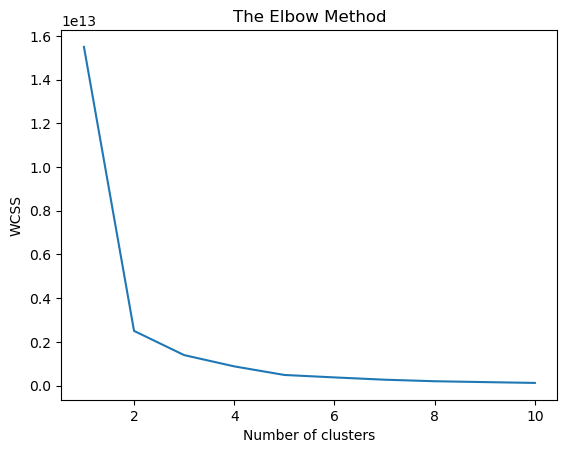

In [40]:
#Elbow method
from sklearn.cluster import KMeans

wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [42]:
#we have created 3 clusters based on area wise

kmeans = KMeans(n_clusters = 3, random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)


[2 2 2 ... 2 2 2]


In [43]:
# Just like in supervised learning we have a metric in unsupervised learning as well
from sklearn.metrics import silhouette_score


In [44]:
silhouette_score(X,y_kmeans)


0.9754390237370042

In [109]:
# Create DataFrames for each cluster areawise

Peaceful_Area = data[y_kmeans==0]
Moderate_Area = data[y_kmeans==1]
Sensitive_Area = data[y_kmeans==2]


In [110]:
Sensitive_Area.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,Procuration of minor girls,Buying of girls for prostitution,Selling of girls for prostitution,Prohibition of child marriage act,Other Crimes,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,1,ADILABAD,2001.0,101.0,60.0,17.0,50.0,0.0,50.0,46.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,ANANTAPUR,2001.0,151.0,125.0,1.0,23.0,0.0,23.0,53.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,CHITTOOR,2001.0,101.0,57.0,2.0,27.0,0.0,27.0,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,CUDDAPAH,2001.0,80.0,53.0,1.0,20.0,0.0,20.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,EAST GODAVARI,2001.0,82.0,67.0,1.0,23.0,0.0,23.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
# 1. What is impacting more crimes in sensitive areas?


Sensitive_Area.describe()

,STATE/UT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,...,Procuration of minor girls,Buying of girls for prostitution,Selling of girls for prostitution,Prohibition of child marriage act,Other Crimes,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
count,44843.000000,8775.000000,8775.000000,8775.000000,8775.000000,8775.000000,8775.000000,8775.000000,8775.00000,8775.000000,...,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000
mean,19.213545,2006.631453,47.533105,41.806610,5.252764,28.300057,0.002963,28.297094,42.44604,31.685470,...,0.906042,0.075966,0.170813,0.248778,15.063638,20.228901,100.511257,27.515582,194.122435,0.197849
std,10.560459,3.463478,48.048134,59.801854,10.006422,32.226385,0.078395,32.222621,62.35420,50.188216,...,8.053667,1.253676,2.565401,1.556544,102.803365,96.970466,394.059436,167.237522,831.986594,2.415039
min,0.000000,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,2004.000000,18.000000,10.000000,0.000000,8.000000,0.000000,8.000000,9.00000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,0.000000,11.000000,0.000000
50%,20.000000,2007.000000,37.000000,27.000000,2.000000,19.000000,0.000000,19.000000,24.00000,17.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,31.000000,2.000000,47.000000,0.000000
75%,29.000000,2010.000000,63.000000,53.000000,6.000000,39.000000,0.000000,39.000000,52.00000,40.000000,...,0.000000,0.000000,0.000000,0.000000,5.000000,16.000000,76.000000,13.000000,135.000000,0.000000
max,35.000000,2012.000000,1075.000000,1474.000000,241.000000,568.000000,5.000000,568.000000,1093.00000,1041.000000,...,369.000000,48.000000,115.000000,43.000000,3004.000000,2322.000000,7118.000000,4970.000000,19865.000000,83.000000


The factors impacting crime rates in sensitive areas can vary and are often complex, influenced by a combination of social, economic, and environmental factors. 
Poverty and Economic Inequality, Unemployment, Education, Gang Activity, Drug Abuse,Housing Conditions, Access to Weapons

In [127]:
# 2. What needs to be done to reduce crime?

common_crime_patterns = Sensitive_Area['MURDER'].value_counts()
common_crime_patterns


MURDER
0.0      185
1.0      151
4.0      145
3.0      144
6.0      141
        ... 
436.0      1
647.0      1
256.0      1
179.0      1
174.0      1
Name: count, Length: 266, dtype: int64

Reducing crime requires a comprehensive and multifaceted approach that addresses the root causes of criminal behavior. Here are several strategies and measures that can be implemented:

Community Policing: Establishing strong relationships between law enforcement and the community fosters trust and cooperation. Community policing involves active engagement with residents to address local concerns and collaboratively find solutions.

Investment in Education: Improving access to quality education and vocational training can provide individuals with better opportunities, reducing the likelihood of engaging in criminal activities.

Employment Opportunities: Creating job opportunities and promoting economic development can help alleviate poverty and reduce the motivation for criminal behavior associated with financial desperation.

Social Programs: Implementing social programs, particularly those targeting at-risk youth, can provide support, mentorship, and constructive activities, diverting individuals away from criminal influences.

Mental Health Services: Addressing mental health issues and providing access to mental health services can contribute to reducing crime, as untreated mental health conditions may be a factor in criminal behavior.



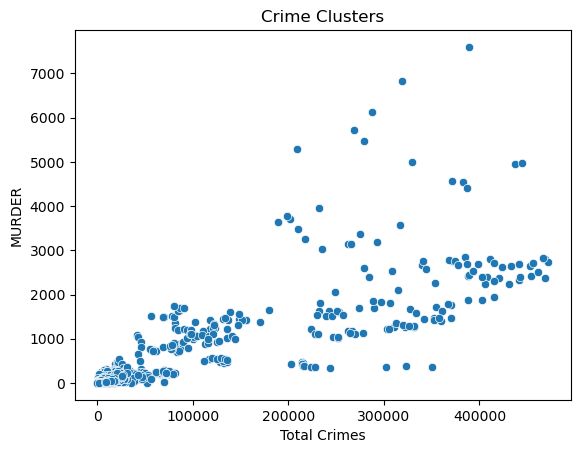

In [128]:
sns.scatterplot(x ='Total Crimes', y='MURDER', data=data)
plt.title('Crime Clusters')
plt.show()



In [132]:
#common crime patterns in sensitive areas

common_crime_patterns = Sensitive_Area['Total Crimes'].value_counts()

print("\nCommon crime patterns in sensitive areas:")
print(common_crime_patterns)



Common crime patterns in sensitive areas:
Total Crimes
0        9752
1        1221
2        1066
3         719
4         715
         ... 
6805        1
10731       1
5513        1
5811        1
739         1
Name: count, Length: 6856, dtype: int64


Understanding these crime patterns is crucial for developing targeted interventions and prevention strategies. 
Addressing the root causes and implementing community-specific initiatives can help reduce crime and improve overall safety in sensitive areas. Collaboration between law enforcement, community organizations, and residents is essential for the success of such efforts.








In [131]:
# 3. Most safe and unsafe districts


district_crime_rates = data.groupby('DISTRICT')['Total Crimes'].mean()

# Identify most safe and unsafe districts
most_safe_district = district_crime_rates.idxmin()
most_unsafe_district = district_crime_rates.idxmax()

print(f"\nMost safe district: {most_safe_district}")
print(f"Most unsafe district: {most_unsafe_district}")



Most safe district: C.B.KASHMIR
Most unsafe district: DELHI UT TOTAL


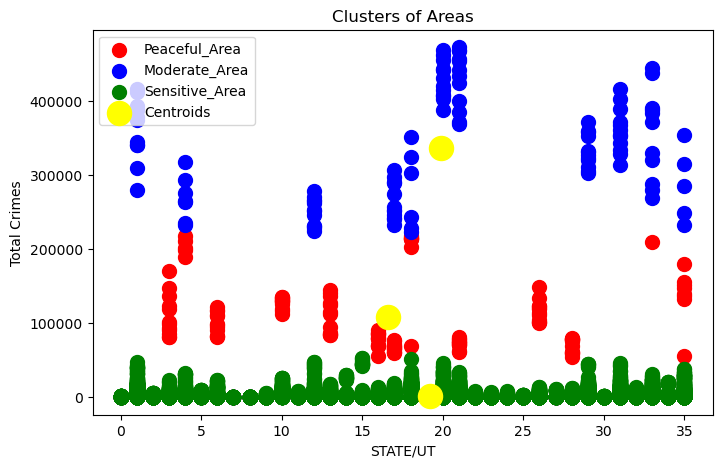

In [112]:
# Visualising the clusters
plt.figure(figsize=(8,5))
plt.scatter(X[y_kmeans == 0]['STATE/UT'], X[y_kmeans == 0]['Total Crimes'], s = 100, c = 'red', label = 'Peaceful_Area')

plt.scatter(X[y_kmeans == 1]['STATE/UT'], X[y_kmeans == 1]['Total Crimes'], s = 100, c = 'blue', label = 'Moderate_Area')

plt.scatter(X[y_kmeans == 2]['STATE/UT'], X[y_kmeans == 2]['Total Crimes'], s = 100, c = 'green', label = 'Sensitive_Area')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Areas')
plt.xlabel('STATE/UT')
plt.ylabel('Total Crimes')
plt.legend()
plt.show()


In [80]:
# It predicts the cluster number to which the datapoint belongs to

test=kmeans.predict(np.asarray([[5,40000]]))
test[0]


2

In [113]:
kmeans.cluster_centers_


array([[1.65813953e+01, 1.07846736e+05],
       [1.98761062e+01, 3.36432549e+05],
       [1.92135450e+01, 1.28208568e+03]])

In [114]:
# MiniBatchKMeans
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=3)
minibatch_kmeans.fit_predict(X)


array([0, 0, 0, ..., 2, 2, 2])

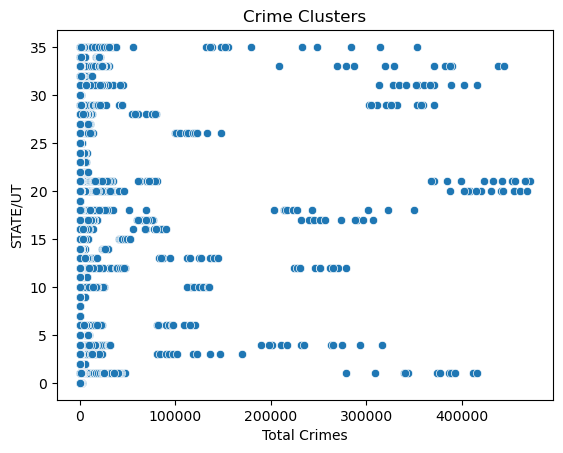

In [117]:
sns.scatterplot(x ='Total Crimes', y='STATE/UT', data=data)
plt.title('Crime Clusters')
plt.show()


 A capstone project is a culminating academic or professional assignment that is designed to showcase the skills and knowledge a student has gained throughout their educational or training program. It is typically a comprehensive and in-depth project that requires extensive research, analysis, problem-solving, and critical thinking.
Capstone projects vary depending on the field and level of study, but they often involve independent research, application of theoretical concepts to real-world situations, and the creation of a final deliverable such as a report, presentation, or prototype. They are an opportunity for students to demonstrate their abilities and make a significant contribution to their field of study.
Capstone projects are commonly found in undergraduate and graduate programs, particularly in disciplines such as engineering, business, computer science, healthcare, and social sciences. They serve as a bridge between academic learning and professional practice, allowing students to apply their knowledge to practical situations and demonstrate their readiness for the workforce or further study.
It took a lots of effort to complete this project and with each phase i have leart something new which will be of great help 
for my future. I came across various analysis tried and understood various graph. The first one was regarding data collection
I visited various sight and collected data from there. Then the next one was the analysis through the data collected. I
have merged all the data together and made analysis through it. Then the next part was of sql where  we need to create tables
and find all the important data. And the last one was the unsupervised machine learning model.
Capstone projects hold significant importance for several reasons:
Integration of knowledge: Capstone projects enable students to consolidate and integrate the knowledge and skills they have acquired throughout their program of study. It provides an opportunity to apply theoretical concepts, research techniques, and analytical skills to real-world problems or scenarios.
Practical application: Capstone projects require students to tackle real-world issues, challenges or case studies. By working on such projects, students can gain practical experience and develop a deeper understanding of how their field of study applies to real-life situations. This helps bridge the gap between theory and practice.
Demonstration of competency: Capstone projects act as a comprehensive assessment of students' skills, knowledge, and readiness for their chosen profession or further academic pursuits. It showcases their ability to think critically, conduct research, analyze data, solve problems, and communicate effectively.
Professional development: Undertaking a capstone project allows students to develop and strengthen a wide range of professional skills. These may include project management, time management, teamwork, presentation skills, research skills, and written communication skills. These competencies are highly valued by employers and are transferable to various work settings.
Contribution to the field: Capstone projects often involve original research, innovative solutions, or the development of new ideas or products. They offer students the opportunity to make a meaningful contribution to their field of study, whether it is through research findings, recommendations, prototypes, or practical implementations.
Overall, capstone projects provide a platform for students to showcase their abilities, gain practical experience, and demonstrate their readiness to enter the workforce or pursue advanced studies. They are instrumental in bridging the gap between academic learning and professional practice.
Capstone projects offer several opportunities for personal growth and improvement:
Self-directed learning: Capstone projects typically require students to take ownership of their learning journey. You are responsible for setting goals, conducting research, making decisions, and managing your time effectively. This fosters self-motivation, self-discipline, and independence, which are essential qualities for personal growth and success.
Critical thinking and problem-solving skills: Capstone projects often involve analyzing complex issues or challenges. By undertaking research, gathering and analyzing data, and proposing solutions, you sharpen your critical thinking and problem-solving skills. These skills are valuable in all aspects of life and are highly sought after by employers.
Research skills: Capstone projects usually involve conducting research to gather relevant information. This allows you to develop and enhance your research skills, such as literature review, data collection methods, data analysis, and interpretation. These skills not only benefit your capstone project but can also be utilized in future academic or professional endeavors.
Collaboration and teamwork: Many capstone projects involve working in teams or collaborating with others. This provides an opportunity to improve your teamwork and collaboration skills, including effective communication, listening, compromising, and resolving conflicts. These skills are crucial in any professional setting where working with others is required.
Presentation and communication skills: Capstone projects often culminate in a final presentation or report. This allows you to enhance your presentation and communication skills, including organizing information, delivering a clear and concise message, engaging an audience, and responding to questions. These skills are valuable in both academic and professional settings.
Confidence building: Undertaking a capstone project and successfully completing it can significantly boost your confidence and self-esteem. It demonstrates your ability to take on challenging tasks, work through obstacles, and achieve your goals. This newfound confidence can extend beyond the project and positively impact other areas of your life.
In summary, capstone projects provide a platform for personal growth and improvement by fostering self-directed learning, critical thinking, research skills, collaboration, presentation skills, and confidence building. These skills are not only beneficial for your capstone project but also have long-term advantages in your personal and professional life.
Through extensive research, data analysis, and practical application, the project has contributed valuable insights and recommendations for further improvement and development in the field. The project has also highlighted the significance of collaboration, critical thinking, and problem-solving skills, which are essential in real-world scenarios. Overall, the capstone project has been a challenging yet rewarding experience, allowing for personal growth and a higher level of expertise in the subject matter. The outcomes and recommendations of this project will serve as a valuable resource for future endeavors and contribute to the overall body of knowledge in the field.